In [ ]:
#Azizjon Kasimov

In [ ]:
pip install tweet-preprocessor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Path = '/content/drive/MyDrive/Tweets.txt'
Path_2 = '/content/drive/MyDrive/ProcessedTweets.csv'
Path_3 = '/content/drive/MyDrive/TweetsTF.csv'
Path_4 = '/content/drive/MyDrive/TweetsSim.csv'

                                    Pre-processedText  Words  UniqueWords
0   As of Dec has deployed members of the Emergenc...     20           19
1   PAGASA: Rains expected in Metro Manila Sunday ...     18           17
2   expected to intensify over to hrs with max win...     20           18
3   Areas under Alert Level C will experience wind...     20           19
4   (Int'l name), fast approaching the PAR &amp; w...     18           18
5   Podcast: Two al-Qaeda captives killed in rescu...     17           17
6   Mass evacuation as Hagupit nears Philippines: ...     15           15
7   If continues under projected track, an est mil...     20           19
8            Typhoon Hagupit Slams Into Philippines .      6            6
9   At least dead after Typhoon Hagupit strikes Ph...      9            9
10  WP Tropical Storm Advisory: , kt/40 mph winds,...     16           15
11                        NDRRMC: flights cancelled .      4            4
12  News: Typhoon Hagupit: food aid di

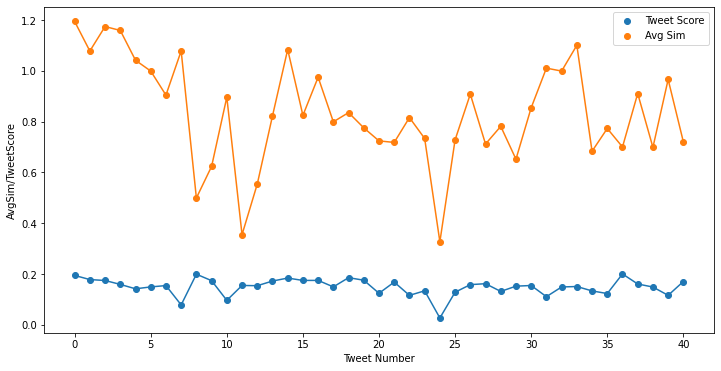

In [ ]:
import pandas as pd
import preprocessor as p
import matplotlib.pyplot as plt

class TweetDemo:
  def __init__(self, path):
    self.path = path
  
  def read_file(self):
    text = []
    with open(self.path, 'r') as file:
      for line in file:
        text.append(line)
      return text
        
  def preprocessor(self):
    text = self.read_file()
    e_text = []
    for line in text:
      e_line = p.clean(line)
      if e_line.startswith(': : '):
        e_line = e_line[4:]
      elif e_line.startswith(': ') or e_line.startswith('. '):
        e_line = e_line[2:]
      e_text.append(e_line)
    return e_text

  def write_CSV(self, csv_path):
    text = self.preprocessor()
    uniq_words, words, _ = self.find_words()
    a = [num for num in range(len(text))]
    df = pd.DataFrame({'Pre-processedText': text, 'Words': words, 'UniqueWords': uniq_words})
    df.to_csv(csv_path)
    print(df)

  def words_list(self):
    text = self.preprocessor()
    uniq_words = []
    for line in text:
      split_lines = line.split(' ')
      for word in split_lines:
        if word not in uniq_words:
          uniq_words.append(word)
    return uniq_words

  def find_words(self):
    text = self.preprocessor()
    words = []
    u_words = {}
    line_count = 0
    for line in text:
      word_list = []
      split_words = line.split(' ')
      words.append(len(split_words))
      u_words[line_count] = 0
      for word in split_words:
        if word not in word_list:
          word_list.append(word)
          u_words[line_count] += 1
      line_count += 1
    uniq_word_list = u_words.values()
    return uniq_word_list, words, u_words

  def word_freq(self):
    text = self.preprocessor()
    words = self.words_list()
    freq_dict = {}
    line_count = 0
    for i in range(41):
      freq_dict[i] = {}
      for word in words:
        freq_dict[i][word] = 0
    for line in text:
      splt_wrds = line.split(' ')
      for word in splt_wrds:
        freq_dict[line_count][word] += 1
      line_count += 1
    return freq_dict

  #Step-4
  def compute_freq(self, csv_path):
    _, _, tweet_id = self.find_words()
    words = self.words_list()
    freq_dict = self.word_freq()
    df = pd.DataFrame({'TweetID': tweet_id.keys()})
    for word in words:
      df[word] = ''
      for i in range(41):
        if word not in freq_dict[i]:
          df.loc[i, word] = str(0)
        else:
          df.loc[i, word] = str(freq_dict[i][word])
    df.to_csv(csv_path)

    
  #Step-5
  def ComputeSim(self, csv_path):
    freq_dict = self.word_freq()
    _, _, tweet_id = self.find_words()
    df = pd.DataFrame({'TweetID': tweet_id.keys()})
    for i in range(41):
      df[i] = ''
      for j in range(41):
        value_1 = freq_dict[i].values()
        value_2 = freq_dict[j].values()
        products = sum([value_1 * value_2 for value_1,value_2 in zip(value_1, value_2)])
        value_1 = sum([num**2 for num in value_1])
        value_2 = sum([num**2 for num in value_2])
        # df[i][j] = products/((value_1**0.5)*(value_2**0.5))
        df.loc[j, i] = products/((value_1**0.5)*(value_2**0.5))
    df.to_csv(csv_path)
    return df
  
  #Step-6
  def ComputeAvgSim(self, csv_path):
    df = self.ComputeSim(Path_4)
    df2 = pd.read_csv(csv_path)
    sim_list = []
    for i in range(41):
      temp = []
      for j in range(41):
        temp.append(df[i][j])
      sim_list.append(temp)
    df2['AvgSim'] = ''
    count = 0
    for elem in sim_list:
      df2.loc[count, 'AvgSim'] = str(sum(elem)/len(elem))
      count += 1
    df2.to_csv(csv_path)
    return df2

  # Step-7
  def ComputeTweetScore_and_Rank(self, csv_path):
    df = pd.read_csv(csv_path)
    df['TweetScore'] = ''
    df['Rank'] = ''
    values_dict = {}
    sorted_dict = {}
    temp = []
    for i in range(41):
      df.loc[i, 'TweetScore'] = df['Words'][i]/20 + df['AvgSim'][i]
      score = df['TweetScore'][i]
      values_dict[i] = score
      temp.append(score)
    temp.sort(reverse=True)
    count = 0
    for i in temp:
      sorted_dict[i] = count
      count += 1
    for i in range(41):
      df.loc[i, 'Rank'] = sorted_dict[values_dict[i]]
    df.to_csv(csv_path)
    return df

  def makePlot(self, csv_path):
    data = pd.read_csv(csv_path)
    tweet_indx = data['Unnamed: 0']
    AvgSim = data['AvgSim']
    TweetScore = data['TweetScore']

    plt.figure(figsize=(12,6))
    plt.scatter(tweet_indx, AvgSim, label='Tweet Score')
    plt.scatter(tweet_indx, TweetScore, label='Avg Sim')

    plt.plot(tweet_indx, AvgSim)
    plt.plot(tweet_indx, TweetScore)

    plt.xlabel('Tweet Number')
    plt.ylabel('AvgSim/TweetScore')
    name = '/content/drive/MyDrive/TweetScorePlot.png'
    plt.savefig(name, dpi=300)

    plt.legend()
    plt.show()
    plt.close()


tweets = TweetDemo(Path)
tweets.write_CSV(Path_2)
tweets.compute_freq(Path_3)
tweets.ComputeSim(Path_4)
tweets.ComputeAvgSim(Path_2)
tweets.ComputeTweetScore_and_Rank(Path_2)
tweets.makePlot(Path_2)

In [ ]:
dict1 = {0:{'word': 1}, 1: {'word2': 2}}
dict1[1]['word2'] = 3
dict1[1]['word3'] = 3
dict1[2] = {}
dict1[2]['word2'] = 1
print(dict1)
print(dict1[1]['word3'])

{0: {'word': 1}, 1: {'word2': 3, 'word3': 3}, 2: {'word2': 1}}
3


In [ ]:
list1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
list2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

products = [a * b for a,b in zip(list1, list2)]
print(sum(products))

385
